# K-Means (K-Medias)

## Un poco de teoría...

### Aprendizaje Automático No Supervisado

El aprendizaje automático no supervisado es un enfoque en el que se utilizan algoritmos para analizar datos sin etiquetas, buscando patrones y estructuras en los datos. Es decir, en este tipo de aprendizaje ya no se provee al modelo de los datos de entrada con sus salidas correspondientes (que serían las etiquetas), sino simplemente los datos de entrada.

Uno de los modelos más comunes en este tipo de aprendizaje es el **algoritmo K-means**, que agrupa datos en k clusters (grupos) basándose en sus características, minimizando la distancia entre los puntos dentro de cada grupo.

### Definición

El aprendizaje automático no supervisado es un tipo de aprendizaje en el que los algoritmos analizan datos sin etiquetas. A diferencia del aprendizaje supervisado, donde se utilizan datos etiquetados para entrenar modelos, en el aprendizaje no supervisado el objetivo es descubrir patrones y relaciones en los datos sin intervención humana.

### Objetivos

- Identificar patrones ocultos en los datos.
- Agrupar instancias similares.
- Detectar anomalías.
- Realizar análisis exploratorios.

### Aplicaciones

- Segmentación de clientes.
- Organización de grandes volúmenes de datos.
- Creación de sistemas de recomendación.

---

### Modelo K-means

#### Definición

K-means es un algoritmo de agrupamiento que divide un conjunto de datos en k grupos o clusters. Los datos se agrupan de tal manera que los puntos en el mismo clúster son más similares entre sí que los puntos en otros clusters.

#### Funcionamiento

1. **Inicialización**: Se seleccionan k centroides aleatorios del conjunto de datos.
2. **Asignación**: Cada punto de datos se asigna al clúster cuyo centroide está más cercano.
3. **Actualización**: Se recalculan los centroides de cada clúster como la media de todos los puntos asignados a ese clúster.
4. **Iteración**: Los pasos de asignación y actualización se repiten hasta que los centroides no cambian significativamente o se alcanza un número máximo de iteraciones.

#### Criterio de Optimización

El algoritmo minimiza la suma de las distancias cuadráticas entre cada punto y el centroide de su clúster, buscando la mejor agrupación posible.

#### Elección de k

Para determinar el número óptimo de clusters (k), se pueden utilizar métodos como el "método del codo", que analiza la suma de errores cuadrados (SSE) para diferentes valores de k y busca el punto donde la disminución de SSE se vuelve menos pronunciada.

#### Ventajas

- Sencillo y fácil de implementar.
- Rápido en comparación con otros algoritmos de agrupamiento.

#### Limitaciones

- Sensible a la elección inicial de los centroides.
- Dificultad para detectar clusters no esféricos.
- Requiere que se especifique el número de clusters de antemano.

## Ejemplo visual paso a paso de formación de clusters

Para este ejemplo, el cual se continuará analizando en el código en `python` de más abajo, tomaremos el caso de un conjunto de datos de clientes que realizan un cierto número de usos a su tarjeta de crédito en función de los fondos de que disponen.

1. Primero, tenemos los datos dispersos:

![K_means](./img/k_means1.png)

2. Posteriormente, establecemos la ubicación de los centroides, cuya cantidad coincidirá con la cantidad de clusters o grupos, la cual en gran medida dependerá del contexto y requerimientos de negocio.

Una vez ubicados los centroides, comienza la primer iteración. La misma consistirá en evaluar la distancia de cada punto de los datos respecto a los centroides (en este caso, respecto los 3 centroides). El centroide más cercano en distancia al punto será el cluster al que corresponderá el dato.

La distancia por lo general se calcula mediante la fórmula de la norma euclidiana de un vector.

![K_means](./img/k_means2.png)

![K_means](./img/k_means3.png)

3. Una vez finalizada la primer iteración, habiendo analizado todos los puntos, tendremos la primera visualización de cómo se van agrupando los datos.

![K_means](./img/k_means4.png)

4. Es momento de comenzar una nueva iteración. Para ello se debe cambiar la ubicación de los centroides.
La nueva ubicación consistirá en un promedio de los datos para cada cluster.

Por ejemplo, el centroide del grupo amarillo tomará su nueva posición en el eje $x$ tomando el promedio de los valores del saldo en cuenta de ahorros de todos los puntos de dicho grupo. Lo mismo para su posición en el eje $y$ tomando el promedio de las veces que se usó la tarjeta de crédito de todos los puntos de dicho grupo.

![K_means](./img/k_means5.png)

5. Hecho esto, se iniciará la iteración nuevamente repitiendo el paso de la evaluación de la distancia de cada punto respecto a cada centroide.

![K_means](./img/k_means6.png)

6. Estos pasos se repetirán hasta un cierto número de iteraciones establecido o bien hasta que ya no se detecten nuevos cambios.

![K_means](./img/k_means7.png)

## Ejemplo en Python

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
clientes = pd.DataFrame({"saldo" : [50000, 45000, 48000, 43500, 47000, 52000, 
                                    20000, 26000, 25000, 23000, 21400, 18000,
                                    8000, 12000, 6000, 14500, 12600, 7000],
                         
                         "transacciones": [25, 20, 16, 23, 25, 18,
                                           23, 22, 24, 21, 27, 18,
                                           8, 3, 6, 4, 9, 3]})
clientes.values

array([[50000,    25],
       [45000,    20],
       [48000,    16],
       [43500,    23],
       [47000,    25],
       [52000,    18],
       [20000,    23],
       [26000,    22],
       [25000,    24],
       [23000,    21],
       [21400,    27],
       [18000,    18],
       [ 8000,     8],
       [12000,     3],
       [ 6000,     6],
       [14500,     4],
       [12600,     9],
       [ 7000,     3]])

Se hace necesario preprocesar nuestros datos (en este caso escalándolos) porque el modelo de K-Means es muy susceptible a las diferencias en las escalas.

In [5]:
escalador = MinMaxScaler().fit(clientes.values)
clientes = pd.DataFrame(escalador.transform(clientes.values),
                        columns=["saldo", "transacciones"])
clientes.head()

,saldo,transacciones
0,0.956522,0.916667
1,0.847826,0.708333
2,0.913043,0.541667
3,0.815217,0.833333
4,0.891304,0.916667


Clusters: [1 1 1 1 1 1 2 2 2 2 2 2 0 0 0 0 0 0] 

      saldo  transacciones  cluster
0  0.956522       0.916667        1
1  0.847826       0.708333        1
2  0.913043       0.541667        1
3  0.815217       0.833333        1
4  0.891304       0.916667        1 

Ubicacion centroides: [[0.08731884 0.10416667]
 [0.90398551 0.75694444]
 [0.35289855 0.8125    ]] 

0.333496880032206 



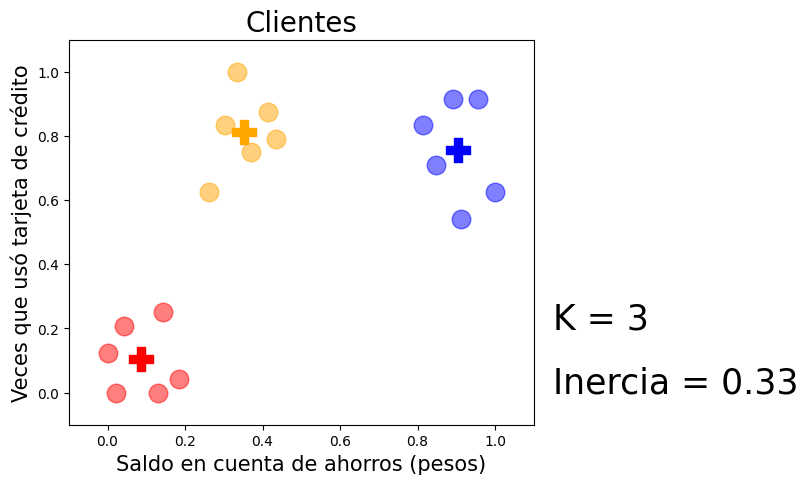

In [25]:
kmeans = KMeans(n_clusters=3, n_init='auto').fit(clientes.values)
print("Clusters:", kmeans.labels_, "\n") # nos devuelve el arreglo con los clusters a los que pertenece cada dato
clientes["cluster"] = kmeans.labels_
print(clientes.head(), "\n")
print("Ubicacion centroides:", kmeans.cluster_centers_, "\n") # nos indican donde se ubican los centroides
print(kmeans.inertia_, "\n")

# Instrucciones para graficar los clusters 

plt.figure(figsize=(6, 5), dpi=100)

colores = ["red", "blue", "orange", "black", "purple", "pink", "brown"]

for cluster in range(kmeans.n_clusters):
    plt.scatter(clientes[clientes["cluster"] == cluster]["saldo"],
                clientes[clientes["cluster"] == cluster]["transacciones"],
                marker="o", s=180, color=colores[cluster], alpha=0.5)
    
    plt.scatter(kmeans.cluster_centers_[cluster][0], 
                kmeans.cluster_centers_[cluster][1], 
                marker="P", s=280, color=colores[cluster])

plt.title("Clientes", fontsize=20)
plt.xlabel("Saldo en cuenta de ahorros (pesos)", fontsize=15)
plt.ylabel("Veces que usó tarjeta de crédito", fontsize=15)
plt.text(1.15, 0.2, "K = %i" % kmeans.n_clusters, fontsize=25)
plt.text(1.15, 0, "Inercia = %0.2f" % kmeans.inertia_, fontsize=25)
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)    
plt.show()

del clientes["cluster"] 

Nótese, si probamos con distintos números de clusters, cómo el valor de la inercia va cambiando. La inercia nos indica qué tan "pegados" están los valores de las observaciones a su respectivo centroide. Cuanto menor es la inercia quiere decir que más pegados están y el cluster está "mejor" confeccionado, ya que el agrupamiento está compuesto por valores bien cercanos entre sí.

A un número de clusters mayor, menor inercia.

A un número de cluster menor, mayor inercia.

Sin embargo, en líneas generales, un modelo de K-Means más óptimo es aquel que posee menor número de clusters y menor inercia.

### Cálculo del número de Clusters (K)

#### Método del codo

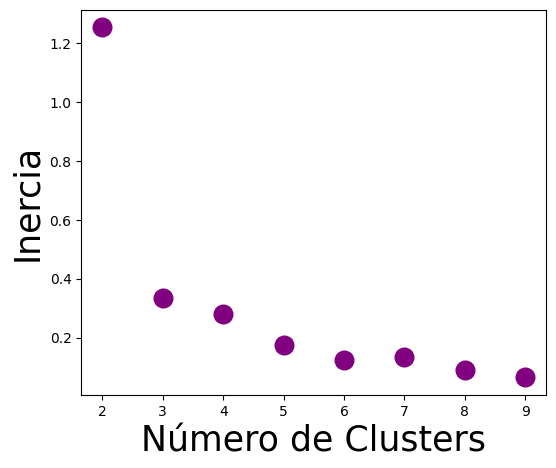

In [24]:
inercias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, n_init='auto').fit(clientes.values)    
    inercias.append(kmeans.inertia_)

plt.figure(figsize=(6, 5), dpi=100)
plt.scatter(range(2, 10), inercias, marker="o", s=180, color="purple")
plt.xlabel("Número de Clusters", fontsize=25)
plt.ylabel("Inercia", fontsize=25)
plt.show()